In [169]:
import numpy as np
import pandas as pd
import tqdm
from sklearn import tree
from kmodes.kmodes import KModes
from sklearn.cluster import SpectralClustering
from collections import Counter
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import math 
import sklearn
import scipy.special as sp
from tqdm import tqdm
import SimpSOM as sps
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from itertools import combinations
%matplotlib notebook

df=[]
df1=[]
#for i in range(7):
#    df.append(pd.read_csv("/home/franc/franc/matches/b"+str(i)+".csv"))

#for i in range(7):
#    df.append(pd.read_csv("/home/franc/franc/matches/f2"+str(i)+".csv"))

for i in range(7):
    df.append(pd.read_csv("/home/franc/franc/matches/ec"+str(i)+".csv"))

#for i in range(7):
#    df.append(pd.read_csv("/home/franc/franc/matches/n"+str(i)+".csv"))

#for i in range(7):
#    df.append(pd.read_csv("/home/franc/franc/matches/scp"+str(i)+".csv"))

#for i in range(7):
#    df.append(pd.read_csv("/home/franc/franc/matches/d2"+str(i)+".csv"))
    
#for i in range(6):
#    df.append(pd.read_csv("/home/franc/franc/matches/d1"+str(i)+".csv"))    

#df1.append(pd.read_csv("/home/franc/franc/matches/SWE.csv"))
#df1.append(pd.read_csv("/home/franc/franc/matches/DNK.csv"))
#df1.append(pd.read_csv("/home/franc/franc/matches/CHN.csv"))
#df1.append(pd.read_csv("/home/franc/franc/matches/ARG.csv"))
#df1.append(pd.read_csv("/home/franc/franc/matches/NOR.csv"))
#df1.append(pd.read_csv("/home/franc/franc/matches/JPN.csv"))#Doesnt work well
#df1.append(pd.read_csv("/home/franc/franc/matches/AUT.csv"))
#df1.append(pd.read_csv("/home/franc/franc/matches/POL.csv"))

df=pd.concat(df,sort=False)
#df1=pd.concat(df1,sort=False)
rat_dic={}
fet_set=[]
tar_set=[]

In [170]:
def Probability(rating1, rating2): 
  
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * ((rating1) - rating2) / 400)) 
  
  
# Function to calculate Elo rating 
# K is a constant. 
# d determines whether 
# Player A wins or Player B.  
def EloRating(Ra, Rb, K, d): 
   
      
    # To calculate the Winning 
    # Probability of Player B 
  
    # To calculate the Winning 
    # Probability of Player A 
    Pa = nprob(Ra, Rb) 
    Pb = 1-Pa
    # Case -1 When Player A wins 
    # Updating the Elo Ratings 
    if (d == 1) : 
        Ra = Ra + K * (1 - Pa) 
        Rb = Rb + K * (0 - Pb) 
      
  
    # Case -2 When Player B wins 
    # Updating the Elo Ratings 
    elif (d==0.5) : 
        Ra = Ra + K * (0.5 - Pa) 
        Rb = Rb + K * (0.5 - Pb) 
      
    else : 
        Ra = Ra + K * (0 - Pa) 
        Rb = Rb + K * (1 - Pb) 
      
    return Ra,Rb
    print("Updated Ratings:-") 
    print("Ra =", round(Ra, 6)," Rb =", round(Rb, 6))

def Probabilityad(rating1, rating2): 
  
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * ((rating1) - rating2) / 400)) 

def nprob(rating1, rating2): 
  
    return 1/2*(1 + sp.erf((rating1-rating2)/(300*math.sqrt(2)))) 

def spreadelo(Ra, Rb, K, ga,gb,n): 
   
      
    # To calculate the Winning 
    # Probability of Player B 
    Pa = nprob(Ra, Rb) 
  
    # To calculate the Winning 
    # Probability of Player A 
    Pb = 1-Pa 
  
    # Case -1 When Player A wins 
    # Updating the Elo Ratings 
    if ga-gb > n:
        Ra=Ra+K*(1-Pa)
        Rb=Rb+K*(0-Pb)
    else:
        Ra=Ra+K*(0-Pa)
        Rb=Rb+K*(1-Pb)
      
    return Ra,Rb

def adelo(Ra, Rb, K, g,n): 
   
      
    # To calculate the Winning 
    # Probability of Player B 
    Pa = nprob(Ra, Rb) 
  
    # To calculate the Winning 
    # Probability of Player A 
    Pb = 1-Pa 
  
    # Case -1 When Player A wins 
    # Updating the Elo Ratings 
    if g > n:
        Ra=Ra+K*(1-Pa)
        Rb=Rb+K*(0-Pb)
    else:
        Ra=Ra+K*(0-Pa)
        Rb=Rb+K*(1-Pb)
      
    return Ra,Rb

def kgvelo(Ra, Rb, K, ga,gb): 
   
      
    # To calculate the Winning 
    # Probability of Player B 
    Pa = nprob(Ra, Rb) 
  
    # To calculate the Winning 
    # Probability of Player A 
    Pb = 1-Pa 
  
    # Case -1 When Player A wins 
    # Updating the Elo Ratings 
    if ga==0:
        Ra=Ra+K*(0-Pa)
    else:
        Ra=Ra+K*(1-Pa)
        
    if gb==0:
        Rb=Rb+K*(0-Pb)
    else:
        Rb=Rb+K*(1-Pb)
      
    return Ra,Rb

In [171]:
df['Date']=pd.to_datetime(df['Date']
                              ,infer_datetime_format=True)
last_two=df[(df["Date"].dt.year>2012) & (df["Date"].dt.year<2018)]
for i in df.HomeTeam.unique():
    rat_dic[i]={"tr":1500,"tr1":1500,"tr-1":1500,"tr2":1500,"tr-2":1500,"ar":1500,"ar1":1500,"ar2":1500,"dr":1500,"dr1":1500,"dr2":1500,"kgv":1500,"nm":0}

test=df[(df["Date"].dt.year>=2014) & (df["Date"].dt.year<2019)]

for i in range(len(last_two)):
    rat_dic[last_two.iloc[i,2]]["tr"],rat_dic[last_two.iloc[i,3]]["tr"]=spreadelo(rat_dic[last_two.iloc[i,2]]["tr"],rat_dic[last_two.iloc[i,3]]["tr"],60,last_two.iloc[i,4],last_two.iloc[i,5],0)
    rat_dic[last_two.iloc[i,2]]["tr1"],rat_dic[last_two.iloc[i,3]]["tr-1"]=spreadelo(rat_dic[last_two.iloc[i,2]]["tr1"],rat_dic[last_two.iloc[i,3]]["tr-1"],60,last_two.iloc[i,4],last_two.iloc[i,5],1)
    rat_dic[last_two.iloc[i,2]]["tr2"],rat_dic[last_two.iloc[i,3]]["tr-2"]=spreadelo(rat_dic[last_two.iloc[i,2]]["tr2"],rat_dic[last_two.iloc[i,3]]["tr-2"],60,last_two.iloc[i,4],last_two.iloc[i,5],2)
    rat_dic[last_two.iloc[i,3]]["tr1"],rat_dic[last_two.iloc[i,2]]["tr-1"]=spreadelo(rat_dic[last_two.iloc[i,3]]["tr1"],rat_dic[last_two.iloc[i,2]]["tr-1"],60,last_two.iloc[i,5],last_two.iloc[i,4],1)
    rat_dic[last_two.iloc[i,3]]["tr2"],rat_dic[last_two.iloc[i,2]]["tr-2"]=spreadelo(rat_dic[last_two.iloc[i,3]]["tr2"],rat_dic[last_two.iloc[i,2]]["tr-2"],60,last_two.iloc[i,5],last_two.iloc[i,4],2)
    rat_dic[last_two.iloc[i,2]]["ar"],rat_dic[last_two.iloc[i,3]]["dr"]=adelo(rat_dic[last_two.iloc[i,2]]["ar"],rat_dic[last_two.iloc[i,3]]["dr"],60,last_two.iloc[i,4],0)
    rat_dic[last_two.iloc[i,3]]["ar"],rat_dic[last_two.iloc[i,2]]["dr"]=adelo(rat_dic[last_two.iloc[i,3]]["ar"],rat_dic[last_two.iloc[i,2]]["dr"],60,last_two.iloc[i,5],0)
    rat_dic[last_two.iloc[i,2]]["ar1"],rat_dic[last_two.iloc[i,3]]["dr1"]=adelo(rat_dic[last_two.iloc[i,2]]["ar1"],rat_dic[last_two.iloc[i,3]]["dr1"],60,last_two.iloc[i,4],1)
    rat_dic[last_two.iloc[i,3]]["ar1"],rat_dic[last_two.iloc[i,2]]["dr1"]=adelo(rat_dic[last_two.iloc[i,3]]["ar1"],rat_dic[last_two.iloc[i,2]]["dr1"],60,last_two.iloc[i,5],1)    
    rat_dic[last_two.iloc[i,2]]["ar2"],rat_dic[last_two.iloc[i,3]]["dr2"]=adelo(rat_dic[last_two.iloc[i,2]]["ar2"],rat_dic[last_two.iloc[i,3]]["dr2"],60,last_two.iloc[i,4],2)
    rat_dic[last_two.iloc[i,3]]["ar2"],rat_dic[last_two.iloc[i,2]]["dr2"]=adelo(rat_dic[last_two.iloc[i,3]]["ar2"],rat_dic[last_two.iloc[i,2]]["dr2"],60,last_two.iloc[i,5],2)     
    rat_dic[last_two.iloc[i,2]]["kgv"],rat_dic[last_two.iloc[i,3]]["kgv"]=kgvelo(rat_dic[last_two.iloc[i,2]]["kgv"],rat_dic[last_two.iloc[i,3]]["kgv"],60,last_two.iloc[i,4],last_two.iloc[i,5])
    rat_dic[last_two.iloc[i,2]]["nm"]+=1
    rat_dic[last_two.iloc[i,3]]["nm"]+=1
    

#tar_set ga,gb,tg,s,kgv,oo,to,tho
for t in range(len(test)):
    tmp=[]
    tmp1=[]
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["tr"],rat_dic[test.iloc[t,3]]["tr"]))   
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["tr1"],rat_dic[test.iloc[t,3]]["tr-1"]))
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["tr2"],rat_dic[test.iloc[t,3]]["tr-2"]))
    tmp.append(nprob(rat_dic[test.iloc[t,3]]["tr1"],rat_dic[test.iloc[t,2]]["tr-1"]))
    tmp.append(nprob(rat_dic[test.iloc[t,3]]["tr2"],rat_dic[test.iloc[t,2]]["tr-2"]))
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["ar"],rat_dic[test.iloc[t,3]]["dr"]))
    tmp.append(nprob(rat_dic[test.iloc[t,3]]["ar"],rat_dic[test.iloc[t,2]]["dr"]))
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["ar1"],rat_dic[test.iloc[t,3]]["dr1"]))
    tmp.append(nprob(rat_dic[test.iloc[t,3]]["ar1"],rat_dic[test.iloc[t,2]]["dr1"]))
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["ar2"],rat_dic[test.iloc[t,3]]["dr2"]))
    tmp.append(nprob(rat_dic[test.iloc[t,3]]["ar2"],rat_dic[test.iloc[t,2]]["dr2"]))
    tmp.append(nprob(rat_dic[test.iloc[t,2]]["kgv"],rat_dic[test.iloc[t,3]]["kgv"]))
    tmp1.append(test.iloc[t,4])
    tmp1.append(test.iloc[t,5])
    tmp1.append(test.iloc[t,4]+test.iloc[t,5])
    tmp1.append(test.iloc[t,4]-test.iloc[t,5])
    tmp1.append((test.iloc[t,4]!=0) and (test.iloc[t,5]!=0))
    tmp1.append(1*((test.iloc[t,4]+test.iloc[t,5])>1.5))
    tmp1.append(1*((test.iloc[t,4]+test.iloc[t,5])>2.5))
    tmp1.append(1*((test.iloc[t,4]+test.iloc[t,5])>3.5))
    fet_set.append(np.array(tmp))
    tar_set.append(np.array(tmp1))

In [15]:
df1['Date']=pd.to_datetime(df1['Date']
                              ,infer_datetime_format=True)
last_two1=df1[(df1["Date"].dt.year>2012) & (df1["Date"].dt.year<2018)]
for i in df1.Home.unique():
    rat_dic[i]={"tr":1500,"tr1":1500,"tr-1":1500,"tr2":1500,"tr-2":1500,"ar":1500,"ar1":1500,"ar2":1500,"dr":1500,"dr1":1500,"dr2":1500,"kgv":1500,"nm":0}

for i in df1.Away.unique():
    rat_dic[i]={"tr":1500,"tr1":1500,"tr-1":1500,"tr2":1500,"tr-2":1500,"ar":1500,"ar1":1500,"ar2":1500,"dr":1500,"dr1":1500,"dr2":1500,"kgv":1500,"nm":0}

test1=df1[(df1["Date"].dt.year>=2014) & (df1["Date"].dt.year<2019)]

for i in range(len(last_two1)):
    rat_dic[last_two1.iloc[i,5]]["tr"],rat_dic[last_two1.iloc[i,6]]["tr"]=spreadelo(rat_dic[last_two1.iloc[i,5]]["tr"],rat_dic[last_two1.iloc[i,6]]["tr"],60,last_two1.iloc[i,7],last_two1.iloc[i,8],0)
    rat_dic[last_two1.iloc[i,5]]["tr1"],rat_dic[last_two1.iloc[i,6]]["tr-1"]=spreadelo(rat_dic[last_two1.iloc[i,5]]["tr1"],rat_dic[last_two1.iloc[i,6]]["tr-1"],60,last_two1.iloc[i,7],last_two1.iloc[i,8],1)
    rat_dic[last_two1.iloc[i,5]]["tr2"],rat_dic[last_two1.iloc[i,6]]["tr-2"]=spreadelo(rat_dic[last_two1.iloc[i,5]]["tr2"],rat_dic[last_two1.iloc[i,6]]["tr-2"],60,last_two1.iloc[i,7],last_two1.iloc[i,8],2)
    rat_dic[last_two1.iloc[i,6]]["tr1"],rat_dic[last_two1.iloc[i,5]]["tr-1"]=spreadelo(rat_dic[last_two1.iloc[i,6]]["tr1"],rat_dic[last_two1.iloc[i,5]]["tr-1"],60,last_two1.iloc[i,8],last_two1.iloc[i,7],1)
    rat_dic[last_two1.iloc[i,6]]["tr2"],rat_dic[last_two1.iloc[i,5]]["tr-2"]=spreadelo(rat_dic[last_two1.iloc[i,6]]["tr2"],rat_dic[last_two1.iloc[i,5]]["tr-2"],60,last_two1.iloc[i,8],last_two1.iloc[i,7],2)
    rat_dic[last_two1.iloc[i,5]]["ar"],rat_dic[last_two1.iloc[i,6]]["dr"]=adelo(rat_dic[last_two1.iloc[i,5]]["ar"],rat_dic[last_two1.iloc[i,6]]["dr"],60,last_two1.iloc[i,7],0)
    rat_dic[last_two1.iloc[i,6]]["ar"],rat_dic[last_two1.iloc[i,5]]["dr"]=adelo(rat_dic[last_two1.iloc[i,6]]["ar"],rat_dic[last_two1.iloc[i,5]]["dr"],60,last_two1.iloc[i,8],0)
    rat_dic[last_two1.iloc[i,5]]["ar1"],rat_dic[last_two1.iloc[i,6]]["dr1"]=adelo(rat_dic[last_two1.iloc[i,5]]["ar1"],rat_dic[last_two1.iloc[i,6]]["dr1"],60,last_two1.iloc[i,7],1)
    rat_dic[last_two1.iloc[i,6]]["ar1"],rat_dic[last_two1.iloc[i,5]]["dr1"]=adelo(rat_dic[last_two1.iloc[i,6]]["ar1"],rat_dic[last_two1.iloc[i,5]]["dr1"],60,last_two1.iloc[i,8],1)    
    rat_dic[last_two1.iloc[i,5]]["ar2"],rat_dic[last_two1.iloc[i,6]]["dr2"]=adelo(rat_dic[last_two1.iloc[i,5]]["ar2"],rat_dic[last_two1.iloc[i,6]]["dr2"],60,last_two1.iloc[i,7],2)
    rat_dic[last_two1.iloc[i,6]]["ar2"],rat_dic[last_two1.iloc[i,5]]["dr2"]=adelo(rat_dic[last_two1.iloc[i,6]]["ar2"],rat_dic[last_two1.iloc[i,5]]["dr2"],60,last_two1.iloc[i,8],2)     
    rat_dic[last_two1.iloc[i,5]]["kgv"],rat_dic[last_two1.iloc[i,6]]["kgv"]=kgvelo(rat_dic[last_two1.iloc[i,5]]["kgv"],rat_dic[last_two1.iloc[i,6]]["kgv"],60,last_two1.iloc[i,7],last_two1.iloc[i,8])
    rat_dic[last_two1.iloc[i,5]]["nm"]+=1
    rat_dic[last_two1.iloc[i,6]]["nm"]+=1
    
#tar_set ga,gb,tg,s,kgv,oo,to,tho
for t in range(len(test1)):
    tmp=[]
    tmp1=[]
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["tr"],rat_dic[test1.iloc[t,6]]["tr"]))   
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["tr1"],rat_dic[test1.iloc[t,6]]["tr-1"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["tr2"],rat_dic[test1.iloc[t,6]]["tr-2"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,6]]["tr1"],rat_dic[test1.iloc[t,5]]["tr-1"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,6]]["tr2"],rat_dic[test1.iloc[t,5]]["tr-2"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["ar"],rat_dic[test1.iloc[t,6]]["dr"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,6]]["ar"],rat_dic[test1.iloc[t,5]]["dr"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["ar1"],rat_dic[test1.iloc[t,6]]["dr1"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,6]]["ar1"],rat_dic[test1.iloc[t,5]]["dr1"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["ar2"],rat_dic[test1.iloc[t,6]]["dr2"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,6]]["ar2"],rat_dic[test1.iloc[t,5]]["dr2"]))
    tmp.append(nprob(rat_dic[test1.iloc[t,5]]["kgv"],rat_dic[test1.iloc[t,6]]["kgv"]))
    tmp1.append(test1.iloc[t,7])
    tmp1.append(test1.iloc[t,8])
    tmp1.append(test1.iloc[t,7]+test1.iloc[t,8])
    tmp1.append(test1.iloc[t,7]-test1.iloc[t,8])
    tmp1.append((test1.iloc[t,7]!=0) and (test1.iloc[t,8]!=0))
    tmp1.append(1*((test1.iloc[t,7]+test1.iloc[t,8])>1.5))
    tmp1.append(1*((test1.iloc[t,7]+test1.iloc[t,8])>2.5))
    tmp1.append(1*((test1.iloc[t,7]+test1.iloc[t,8])>3.5))
    fet_set.append(np.array(tmp))
    tar_set.append(np.array(tmp1))



In [37]:
n=40
for i in range(n):
    t1=df[(df["Date"].dt.year==2019) ].iloc[i,2]
    t2=df[(df["Date"].dt.year==2019) ].iloc[i,3]
    tmp=[]
    
    tmp1=[]
#t1="Anderlecht"
#t2="Oostende"
    tmp.append(nprob(rat_dic[t1]["tr"],rat_dic[t2]["tr"]))   
    tmp.append(nprob(rat_dic[t1]["tr1"],rat_dic[t2]["tr-1"]))
    tmp.append(nprob(rat_dic[t1]["tr2"],rat_dic[t2]["tr-2"]))
    tmp.append(nprob(rat_dic[t2]["tr1"],rat_dic[t1]["tr-1"]))
    tmp.append(nprob(rat_dic[t2]["tr2"],rat_dic[t1]["tr-2"]))
    tmp.append(nprob(rat_dic[t1]["ar"],rat_dic[t2]["dr"]))
    tmp.append(nprob(rat_dic[t2]["ar"],rat_dic[t1]["dr"]))
    tmp.append(nprob(rat_dic[t1]["ar1"],rat_dic[t2]["dr1"]))
    tmp.append(nprob(rat_dic[t2]["ar1"],rat_dic[t1]["dr1"]))
    tmp.append(nprob(rat_dic[t1]["ar2"],rat_dic[t2]["dr2"]))
    tmp.append(nprob(rat_dic[t2]["ar2"],rat_dic[t1]["dr2"]))
    tmp.append(nprob(rat_dic[t1]["kgv"],rat_dic[t2]["kgv"]))
    fet_set.append(tmp)
    tmp1.append(test.iloc[i,4])
    tmp1.append(test.iloc[i,5])
    tmp1.append(test.iloc[i,4]+test.iloc[i,5])
    tmp1.append(test.iloc[i,4]-test.iloc[i,5])
    tmp1.append((test.iloc[i,4]!=0) and (test.iloc[i,5]!=0))
    tmp1.append(1*((test.iloc[i,4]+test.iloc[i,5])>1.5))
    tmp1.append(1*((test.iloc[i,4]+test.iloc[i,5])>2.5))
    tmp1.append(1*((test.iloc[i,4]+test.iloc[i,5])>3.5))
    tar_set.append(np.array(tmp1))
    print(t1,t2,tmp1,i)

Hoffenheim Bayern Munich [0, 2, 2, -2, False, 1, 0, 0] 0
Augsburg Fortuna Dusseldorf [2, 2, 4, 0, True, 1, 1, 1] 1
Ein Frankfurt Freiburg [1, 0, 1, 1, False, 0, 0, 0] 2
Hannover Werder Bremen [3, 2, 5, 1, True, 1, 1, 1] 3
Leverkusen M'gladbach [4, 0, 4, 4, False, 1, 1, 1] 4
RB Leipzig Dortmund [1, 2, 3, -1, True, 1, 1, 0] 5
Stuttgart Mainz [1, 3, 4, -2, True, 1, 1, 1] 6
Nurnberg Hertha [0, 3, 3, -3, False, 1, 1, 0] 7
Schalke 04 Wolfsburg [0, 0, 0, 0, False, 0, 0, 0] 8
Hertha Schalke 04 [1, 2, 3, -1, True, 1, 1, 0] 9
Dortmund Hannover [1, 2, 3, -1, True, 1, 1, 0] 10
Freiburg Hoffenheim [3, 1, 4, 2, True, 1, 1, 1] 11
Mainz Nurnberg [3, 1, 4, 2, True, 1, 1, 1] 12
M'gladbach Augsburg [3, 0, 3, 3, False, 1, 1, 0] 13
Werder Bremen Ein Frankfurt [2, 1, 3, 1, True, 1, 1, 0] 14
Wolfsburg Leverkusen [2, 0, 2, 2, False, 1, 0, 0] 15
Bayern Munich Stuttgart [2, 1, 3, 1, True, 1, 1, 0] 16
Fortuna Dusseldorf RB Leipzig [5, 0, 5, 5, False, 1, 1, 1] 17
Hannover RB Leipzig [1, 3, 4, -2, True, 1, 1, 1] 1

In [8]:
n=40
for i in range(len(df1[(df1["Date"].dt.year==2019)])):
    t1=df1[(df1["Date"].dt.year==2019) ].iloc[i,5]
    t2=df1[(df1["Date"].dt.year==2019) ].iloc[i,6]
    tmp=[]
    
    tmp1=[]
#t1="Anderlecht"
#t2="Oostende"
    tmp.append(nprob(rat_dic[t1]["tr"],rat_dic[t2]["tr"]))   
    tmp.append(nprob(rat_dic[t1]["tr1"],rat_dic[t2]["tr-1"]))
    tmp.append(nprob(rat_dic[t1]["tr2"],rat_dic[t2]["tr-2"]))
    tmp.append(nprob(rat_dic[t2]["tr1"],rat_dic[t1]["tr-1"]))
    tmp.append(nprob(rat_dic[t2]["tr2"],rat_dic[t1]["tr-2"]))
    tmp.append(nprob(rat_dic[t1]["ar"],rat_dic[t2]["dr"]))
    tmp.append(nprob(rat_dic[t2]["ar"],rat_dic[t1]["dr"]))
    tmp.append(nprob(rat_dic[t1]["ar1"],rat_dic[t2]["dr1"]))
    tmp.append(nprob(rat_dic[t2]["ar1"],rat_dic[t1]["dr1"]))
    tmp.append(nprob(rat_dic[t1]["ar2"],rat_dic[t2]["dr2"]))
    tmp.append(nprob(rat_dic[t2]["ar2"],rat_dic[t1]["dr2"]))
    tmp.append(nprob(rat_dic[t1]["kgv"],rat_dic[t2]["kgv"]))
    fet_set.append(tmp)
    tmp1.append(test1.iloc[i,7])
    tmp1.append(test1.iloc[i,8])
    tmp1.append(test1.iloc[i,7]+test1.iloc[i,8])
    tmp1.append(test1.iloc[i,7]-test1.iloc[i,8])
    tmp1.append((test1.iloc[i,7]!=0) and (test1.iloc[i,8]!=0))
    tmp1.append(1*((test1.iloc[i,7]+test1.iloc[i,8])>1.5))
    tmp1.append(1*((test1.iloc[i,7]+test1.iloc[i,8])>2.5))
    tmp1.append(1*((test1.iloc[i,7]+test1.iloc[i,8])>3.5))
    tar_set.append(np.array(tmp1))
    print(t1,t2,tmp1,i)

AIK Ostersunds [1, 2, 3, -1, True, 1, 1, 0] 0
Falkenbergs Orebro [1, 1, 2, 0, True, 1, 0, 0] 1
Kalmar Sirius [2, 2, 4, 0, True, 1, 1, 1] 2
AFC Eskilstuna Goteborg [1, 2, 3, -1, True, 1, 1, 0] 3
Helsingborg Norrkoping [3, 0, 3, 3, False, 1, 1, 0] 4
Djurgarden Sundsvall [2, 1, 3, 1, True, 1, 1, 0] 5
Elfsborg Hammarby [2, 0, 2, 2, False, 1, 0, 0] 6
Malmo FF Hacken [0, 2, 2, -2, False, 1, 0, 0] 7
Hacken Helsingborg [3, 1, 4, 2, True, 1, 1, 1] 8
Sundsvall Malmo FF [1, 0, 1, 1, False, 0, 0, 0] 9
Goteborg Elfsborg [3, 0, 3, 3, False, 1, 1, 0] 10
Ostersunds Falkenbergs [1, 2, 3, -1, True, 1, 1, 0] 11
Hammarby Kalmar [2, 0, 2, 2, False, 1, 0, 0] 12
Norrkoping AIK [2, 2, 4, 0, True, 1, 1, 1] 13
Orebro Djurgarden [0, 3, 3, -3, False, 1, 1, 0] 14
Sirius AFC Eskilstuna [1, 0, 1, 1, False, 0, 0, 0] 15
AFC Eskilstuna Orebro [0, 2, 2, -2, False, 1, 0, 0] 16
Falkenbergs Hacken [2, 0, 2, 2, False, 1, 0, 0] 17
Kalmar Norrkoping [1, 0, 1, 1, False, 0, 0, 0] 18
AIK Sirius [1, 1, 2, 0, True, 1, 0, 0] 19
Elf

In [172]:
#asa=list(df1.Away.unique())
asa=list(df.AwayTeam.unique())

td={}
for i in range(len(asa)):
    td[asa[i]]=i
for i in td:
    print(i,td[i])

Huddersfield 0
Middlesbrough 1
Charlton 2
Bolton 3
Watford 4
Sheffield Weds 5
Brighton 6
Blackburn 7
Wolves 8
Peterboro 9
Blackpool 10
Bristol City 11
Leeds 12
Derby 13
Cardiff 14
Crystal Palace 15
Leicester 16
Nott'm Forest 17
Burnley 18
Millwall 19
Birmingham 20
Ipswich 21
Barnsley 22
Hull 23
Wigan 24
Yeovil 25
Reading 26
QPR 27
Bournemouth 28
Doncaster 29
Rotherham 30
Fulham 31
Norwich 32
Brentford 33
nan 34
Milton Keynes Dons 35
Preston 36
Newcastle 37
Burton 38
Aston Villa 39
Sheffield United 40
Sunderland 41
Swansea 42
Stoke 43
West Brom 44


In [165]:
fet_set=list(fet_set)[:-n]
tar_set=list(tar_set)[:-n]

In [173]:
n=1
t1=asa[22]
t2=asa[31]
tmp=[]
    
tmp1=[]
#t1="Anderlecht"
#t2="Oostende"
tmp.append(nprob(rat_dic[t1]["tr"],rat_dic[t2]["tr"]))   
tmp.append(nprob(rat_dic[t1]["tr1"],rat_dic[t2]["tr-1"]))
tmp.append(nprob(rat_dic[t1]["tr2"],rat_dic[t2]["tr-2"]))
tmp.append(nprob(rat_dic[t2]["tr1"],rat_dic[t1]["tr-1"]))
tmp.append(nprob(rat_dic[t2]["tr2"],rat_dic[t1]["tr-2"]))
tmp.append(nprob(rat_dic[t1]["ar"],rat_dic[t2]["dr"]))
tmp.append(nprob(rat_dic[t2]["ar"],rat_dic[t1]["dr"]))
tmp.append(nprob(rat_dic[t1]["ar1"],rat_dic[t2]["dr1"]))
tmp.append(nprob(rat_dic[t2]["ar1"],rat_dic[t1]["dr1"]))
tmp.append(nprob(rat_dic[t1]["ar2"],rat_dic[t2]["dr2"]))
tmp.append(nprob(rat_dic[t2]["ar2"],rat_dic[t1]["dr2"]))
tmp.append(nprob(rat_dic[t1]["kgv"],rat_dic[t2]["kgv"]))
fet_set.append(tmp)
tmp1=np.array([0,0,0,0,0,0,0,1])
tar_set.append(np.array(tmp1))
print(t1,t2,tmp1,i)

Barnsley Fulham [0 0 0 0 0 0 0 1] West Brom


In [112]:
fet_set=np.array(fet_set)
tar_set=np.array(tar_set)
nc=200
f=[[[[] for i in range(nc)] for j in range(3)]for i in range(4)]
ft=[]

In [10]:
def find_c(clust,mid):
    for i in range(len(clust)):
        for j in range(len(clust[i])):
            if(clust[i][j]==mid):
                return i

In [ ]:

net = sps.somNet(20, 20, fet_set, PBC=True)
net.train(0.01, 10000)
c=net.cluster(fet_set, type='KMeans',numcl=200)

In [89]:
len(fet_set),len(tar_set),len(test),n

(2786, 2786, 2785, 1)

In [40]:
to_test=[]

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


<IPython.core.display.Javascript object>


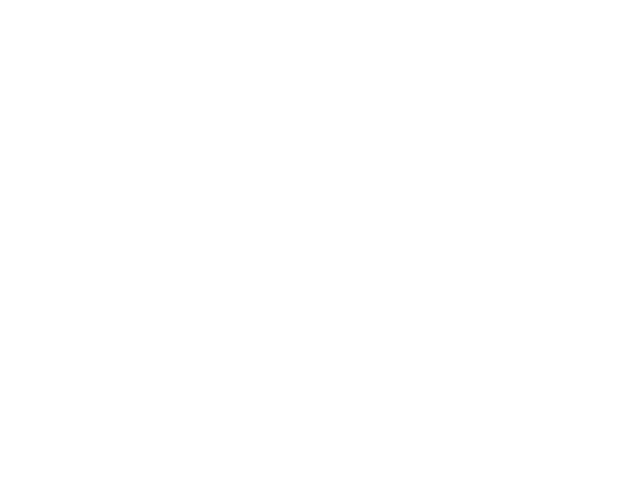

100%|██████████| 1/1 [00:00<00:00, 360.24it/s]


[[[1.0, 3.0, 4.0, -2.0, 1.0, 1.0, 1.0, 1.0], 20], [[1.0, 2.0, 3.0, -1.0, 1.0, 1.0, 1.0, 0.0], 24], [[2.0, 2.0, 4.0, 0.0, 1.0, 1.0, 1.0, 1.0], 31], [[2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 0.0], 27], [[3.0, 2.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0], 20], [[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], 21], [[0.0, 2.0, 2.0, -2.0, 0.0, 1.0, 0.0, 0.0], 22]] 
 [] [0. 0. 0. 0. 0. 0. 0. 1.] ||| 13 
 --------- 
 [0. 0. 0. 0. 0. 0. 0. 1.] 



In [177]:
fet_set=np.array(fet_set)
tar_set=np.array(tar_set)
nc=200
f=[[[[] for i in range(nc)] for j in range(3)]for i in range(5)]
ft=[]
rft=[]
d1=[]
d2=[]
d=[]
d3=[]
net = sps.somNet(20, 20, fet_set)
net.train(0.01, 10000)
c=net.cluster(fet_set, type='KMeans',numcl=170)
pca0 = PCA(n_components=4)
l=pca0.fit_transform(fet_set[:,:12])
kmeans0 = KMeans(n_clusters=nc, random_state=0).fit(l)
clustering0 = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
clustering01 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

for i in range(len(kmeans0.labels_)-1):
    f[0][0][kmeans0.labels_[i]].append(tar_set[i])
for i in range(len(clustering0.labels_)-1):
    f[0][1][clustering0.labels_[i]].append(tar_set[i])
for i in range(len(clustering01.labels_)-1):
    f[0][2][clustering01.labels_[i]].append(tar_set[i])

transformer1 = KernelPCA(n_components=3, kernel="cosine")
l=transformer1.fit_transform(fet_set[:,:12])
kmeans1 = KMeans(n_clusters=nc, random_state=0).fit(l)
clustering1 = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
clustering11 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

for i in range(len(kmeans1.labels_)-1):
    f[1][0][kmeans1.labels_[i]].append(tar_set[i])
for i in range(len(clustering1.labels_)-1):
    f[1][1][clustering1.labels_[i]].append(tar_set[i])
for i in range(len(clustering11.labels_)-1):
    f[1][2][clustering11.labels_[i]].append(tar_set[i])
        

transformer2 = KernelPCA(n_components=3, kernel="rbf")
l=transformer2.fit_transform(fet_set[:,:12])
kmeans2 = KMeans(n_clusters=nc, random_state=0).fit(l)
clustering2 = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
clustering21 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

for i in range(len(kmeans2.labels_)-1):
    f[2][0][kmeans2.labels_[i]].append(tar_set[i])
for i in range(len(clustering2.labels_)-1):
    f[2][1][clustering2.labels_[i]].append(tar_set[i])
for i in range(len(clustering21.labels_)-1):
    f[2][2][clustering21.labels_[i]].append(tar_set[i])
        
transformer3 = FastICA(n_components=4,random_state=0,tol=1)
l=transformer3.fit_transform(fet_set[:,:12])
kmeans3 = KMeans(n_clusters=nc, random_state=0).fit(l)
clustering3 = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
clustering31 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

for i in range(len(kmeans3.labels_)-1):
    f[3][0][kmeans3.labels_[i]].append(tar_set[i])
for i in range(len(clustering3.labels_)-1):
    f[3][1][clustering3.labels_[i]].append(tar_set[i])
for i in range(len(clustering31.labels_)-1):
    f[3][2][clustering31.labels_[i]].append(tar_set[i])

transformer4 = FastICA(n_components=4,random_state=0,tol=1)
l=transformer4.fit_transform(fet_set[:,:12])
clustering4 = SpectralClustering(n_clusters=200,assign_labels="discretize",random_state=0).fit(l)        
        
for i in range(len(clustering4.labels_)-1):
    f[4][0][clustering4.labels_[i]].append(tar_set[i])
for j in tqdm(range(1,1+n)):
    ft=[]
    
    
    ft+=[kmeans0.labels_[-1*j],clustering0.labels_[-1*j],clustering01.labels_[-1*j]]

    
    
    ft+=[kmeans1.labels_[-1*j],clustering1.labels_[-1*j],clustering11.labels_[-1*j]]

    
    
    ft+=[kmeans2.labels_[-1*j],clustering2.labels_[-1*j],clustering21.labels_[-1*j]]
    ft+=[clustering4.labels_[-1*j]]
    
    
    
    cid=find_c(c,len(fet_set)-1*j)
    
    ft+=[kmeans3.labels_[-1*j],clustering3.labels_[-1*j],clustering31.labels_[-1*j]]
    d3+=[tar_set[-j]]
    tm2=[]
    tm1=[]
    tm=[]
    tm+=[np.array([list(np.array(tar_set)[np.array(c[cid])[:]])])]
    for k in range(len(ft)):
        
        #print(int(k/3),(k-3*int(k/3))%3,ft[k],np.array(f[int(k/3)][(k-3*int(k/3))%3][ft[k]]))
        tm+=[np.array([np.array(f[int(k/3)][(k-3*int(k/3))%3][ft[k]]) ])]
        tm1+=[np.array([np.array(f[int(k/3)][(k-3*int(k/3))%3][ft[k]])[:,u].mean() for u in range(len(tar_set[0]))])]
        tm2+=[len(f[int(k/3)][(k-3*int(k/3))%3][ft[k]])]
        #print("-------------------------------------------------")
    d+=[tm]
    d1+=[tm1]
    d2+=[tm2]
    
cl=list(combinations(range(13), 10))+list(combinations(range(13), 11))+list(combinations(range(13), 12))    
cl=[(0, 1, 2,3, 4, 5, 6, 7, 8,6,10,11,12)]
for cmb in cl:    
    score=0
    for ki in range(n):
        ff=[]
        gg=[]
        #ki=20
        g=-10
        transformer = KernelPCA(n_components=4, kernel="rbf")
        l=transformer.fit_transform(fet_set[:,:8])
        pw=sklearn.metrics.pairwise.cosine_similarity(l)
        gg.append(list(map(list,\
                       list(tar_set[pw[-1-ki].argsort()[g:][::-1][1:]]))))
        pw=sklearn.metrics.pairwise.laplacian_kernel(l)
        gg.append(list(map(list,\
                       list(tar_set[pw[-1-ki].argsort()[g:][::-1][1:]]))))
        for i in range(13):
            gg.append([[d[-1-ki][i][0][u][p] for p in range(len(d[-1-ki][i][0][u]))] for u in range(len(d[-1-ki][i][0]))])
        dic={}
        dic1={}
        for cm in cmb:
            ff.append(gg[cm])
        for i in range(len(ff)):
            for j in range(len(ff[i])):
                if(str(ff[i][j]) not in dic):
                    dic[str(ff[i][j])]=ff[i][j]
                if(str(ff[i][j]) not in dic1):
                    dic1[str(ff[i][j])]=1
                else:
                    dic1[str(ff[i][j])]+=1
       
        to_test.append([t1,t2,[[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (4/3)*len(ff)]]])
#print(len(ff),dic1) 
        #score+=bet_asseser(s_bet(sumff([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (3/2)*len(ff)]])),d3[-1-ki])
        print([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (4/3)*len(ff)]],"\n",s_bet(sumff([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (3/2)*len(ff)]])),d3[-1-ki],"|||",len(ff),"\n --------- \n",d3[-1-ki],"\n ======= \n")
    
    #score=score/n
    #print(score,cmb)
    
#0.7645833333333334 (0, 1, 3, 4, 6, 7, 8, 11)
#0.7645833333333334 (0, 1, 3, 4, 7, 8, 9, 12)
#0.7666666666666666 (0, 1, 5, 6, 7, 8, 9, 12)
#0.76875 (0, 2, 3, 4, 6, 7, 8, 11)
#0.7708333333333333 (1, 2, 3, 5, 6, 7, 8, 11)
#0.7729166666666667 (0, 1, 2, 4, 5, 6, 7, 8)

In [178]:
d

[[array([[[ 3.,  0.,  3.,  3.,  0.,  1.,  1.,  0.],
          [ 2.,  1.,  3.,  1.,  1.,  1.,  1.,  0.],
          [ 2.,  4.,  6., -2.,  1.,  1.,  1.,  1.],
          [ 0.,  2.,  2., -2.,  0.,  1.,  0.,  0.],
          [ 2.,  3.,  5., -1.,  1.,  1.,  1.,  1.],
          [ 2.,  2.,  4.,  0.,  1.,  1.,  1.,  1.],
          [ 1.,  3.,  4., -2.,  1.,  1.,  1.,  1.],
          [ 3.,  2.,  5.,  1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]]),
  array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
          [ 2.,  2.,  4.,  0.,  1.,  1.,  1.,  1.],
          [ 1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
          [ 3.,  0.,  3.,  3.,  0.,  1.,  1.,  0.],
          [ 4.,  0.,  4.,  4.,  0.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
          [ 2.,  2.,  4.,  0.,  1.,  1.,  1.,  1.],
          [ 2.,  4.,  6., -2.,  1.,  1.,  1.,  1.],
          [ 0.,  2.,  2., -2.,  0.,  1.,  0.,  0.],
          [ 2.,  1.,  3.,  1.,  1.,  1.,  1.,  0.],
         

In [157]:
pd.DataFrame(to_test).to_csv("tested.csv")

In [ ]:
fet_set=np.array(fet_set)
tar_set=np.array(tar_set)
nc=200
f=[[[[] for i in range(nc)] for j in range(3)]for i in range(4)]
ft=[]
rft=[]
d1=[]
d2=[]
d=[]
d3=[]
net = sps.somNet(20, 20, fet_set, PBC=True)
net.train(0.01, 10000)
c=net.cluster(fet_set, type='KMeans',numcl=200)
for j in tqdm(range(1,1+n)):
    ft=[]
    f=[[[[] for i in range(nc)] for j in range(3)]for i in range(4)]
    pca = PCA(n_components=4)
    l=pca.fit_transform(fet_set[:,:12])
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(l)
    clustering = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
    clustering1 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

    for i in range(len(kmeans.labels_)-1):
        f[0][0][kmeans.labels_[i]].append(tar_set[i])
    for i in range(len(clustering.labels_)-1):
        f[0][1][clustering.labels_[i]].append(tar_set[i])
    for i in range(len(clustering1.labels_)-1):
        f[0][2][clustering1.labels_[i]].append(tar_set[i])
    
    ft+=[kmeans.labels_[-1*j],clustering.labels_[-1*j],clustering1.labels_[-1*j]]

    transformer = KernelPCA(n_components=3, kernel="cosine")
    l=transformer.fit_transform(fet_set[:,:12])
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(l)
    clustering = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
    clustering1 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

    for i in range(len(kmeans.labels_)-1):
        f[1][0][kmeans.labels_[i]].append(tar_set[i])
    for i in range(len(clustering.labels_)-1):
        f[1][1][clustering.labels_[i]].append(tar_set[i])
    for i in range(len(clustering1.labels_)-1):
        f[1][2][clustering1.labels_[i]].append(tar_set[i])
    
    ft+=[kmeans.labels_[-1*j],clustering.labels_[-1*j],clustering1.labels_[-1*j]]

    transformer = KernelPCA(n_components=3, kernel="rbf")
    l=transformer.fit_transform(fet_set[:,:12])
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(l)
    clustering = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
    clustering1 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

    for i in range(len(kmeans.labels_)-1):
        f[2][0][kmeans.labels_[i]].append(tar_set[i])
    for i in range(len(clustering.labels_)-1):
        f[2][1][clustering.labels_[i]].append(tar_set[i])
    for i in range(len(clustering1.labels_)-1):
        f[2][2][clustering1.labels_[i]].append(tar_set[i])
    
    ft+=[kmeans.labels_[-1*j],clustering.labels_[-1*j],clustering1.labels_[-1*j]]

    transformer = FastICA(n_components=4,random_state=0,tol=1)
    l=transformer.fit_transform(fet_set[:,:12])
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(l)
    clustering = AgglomerativeClustering(n_clusters=nc,linkage="ward").fit(l)
    clustering1 = AgglomerativeClustering(n_clusters=nc,linkage="complete").fit(l)

    for i in range(len(kmeans.labels_)-1):
        f[3][0][kmeans.labels_[i]].append(tar_set[i])
    for i in range(len(clustering.labels_)-1):
        f[3][1][clustering.labels_[i]].append(tar_set[i])
    for i in range(len(clustering1.labels_)-1):
        f[3][2][clustering1.labels_[i]].append(tar_set[i])
    
    
    cid=find_c(c,len(fet_set)-1*j)
    
    ft+=[kmeans.labels_[-1*j],clustering.labels_[-1*j],clustering1.labels_[-1*j]]
    d3+=[tar_set[-j]]
    tm2=[]
    tm1=[]
    tm=[]
    tm+=[np.array([list(np.array(tar_set)[np.array(c[cid])[:]])])]
    for k in range(len(ft)):
        #print(int(k/3),(k-3*int(k/3))%3,ft[k],np.array(f[int(k/3)][(k-3*int(k/3))%3][ft[k]]))
        tm+=[np.array([np.array(f[int(k/3)][(k-3*int(k/3))%3][ft[k]]) ])]
        tm1+=[np.array([np.array(f[int(k/3)][(k-3*int(k/3))%3][ft[k]])[:,u].mean() for u in range(len(tar_set[0]))])]
        tm2+=[len(f[int(k/3)][(k-3*int(k/3))%3][ft[k]])]
        #print("-------------------------------------------------")
    d+=[tm]
    d1+=[tm1]
    d2+=[tm2]

for ki in range(n):
    ff=[]
    #ki=20
    g=-10
    transformer = KernelPCA(n_components=4, kernel="rbf")
    l=transformer.fit_transform(fet_set[:,:8])
    pw=sklearn.metrics.pairwise.cosine_similarity(l)
    ff.append(list(map(list,\
                   list(tar_set[pw[-1-ki].argsort()[g:][::-1][1:]]))))
    pw=sklearn.metrics.pairwise.laplacian_kernel(l)
    ff.append(list(map(list,\
                   list(tar_set[pw[-1-ki].argsort()[g:][::-1][1:]]))))
    for i in range(13):
        ff.append([[d[-1-ki][i][0][u][p] for p in range(len(d[-1-ki][i][0][u]))] for u in range(len(d[-1-ki][i][0]))])
    dic={}
    dic1={}
    for i in range(len(ff)):
        for j in range(len(ff[i])):
            if(str(ff[i][j]) not in dic):
                dic[str(ff[i][j])]=ff[i][j]
            if(str(ff[i][j]) not in dic1):
                dic1[str(ff[i][j])]=1
            else:
                dic1[str(ff[i][j])]+=1
#print(len(ff),dic1)            
    print([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (8/5)*len(ff)]],"|||",len(ff),"\n --------- \n",d3[-1-ki],"\n ======= \n")

In [40]:
for i in range(len(d2)):
    for j in range(len(d2[i])):
        d1[i][j]*=(d2[i][j]/sum(d2[i]))
for i in range(len(d1)):
    d1[i]=np.transpose(d1[i])

In [168]:
for i in range(len(f)):
    for j in range(len(f[i])):
        for k in range(len(f[i][j])):
            if f[i][j][k]==[]:
                print(i,j,k)

1 2 127


In [159]:
score=0
for ki in range(n):
    
    ff=[]
    #ki=20
    g=-10
    transformer = KernelPCA(n_components=4, kernel="rbf")
    l=transformer.fit_transform(fet_set[:,:8])
    pw=sklearn.metrics.pairwise.cosine_similarity(l)
    ff.append(list(map(list,\
                   list(tar_set[pw[-1-ki].argsort()[g:][::-1][1:]]))))
    pw=sklearn.metrics.pairwise.laplacian_kernel(l)
    ff.append(list(map(list,\
                   list(tar_set[pw[-1-ki].argsort()[g:][::-1][1:]]))))
    for i in range(13):
        ff.append([[d[-1-ki][i][0][u][p] for p in range(len(d[-1-ki][i][0][u]))] for u in range(len(d[-1-ki][i][0]))])
    dic={}
    dic1={}
    for i in range(len(ff)):
        for j in range(len(ff[i])):
            if(str(ff[i][j]) not in dic):
                dic[str(ff[i][j])]=ff[i][j]
            if(str(ff[i][j]) not in dic1):
                dic1[str(ff[i][j])]=1
            else:
                dic1[str(ff[i][j])]+=1
#print(len(ff),dic1) 
    score+=bet_asseser(s_bet(sumff([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (3/2)*len(ff)]])),d3[-1-ki])
    print([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (4/3)*len(ff)]],"\n",bet_asseser(s_bet(sumff([[dic[i],dic1[i]] for i in [k for (k,v) in dic1.items() if v >= (3/2)*len(ff)]])),d3[-1-ki]),"|||",len(ff),"\n --------- \n",d3[-1-ki],"\n ======= \n")
    
score=score/n
print(score)

1x: 1
3.5: 1
1x: 1
3.5: 1
[[[1, 1, 2, 0, 1, 1, 0, 0], 59], [[1, 0, 1, 1, 0, 0, 0, 0], 30], [[0, 0, 0, 0, 0, 0, 0, 0], 27]] 
 1.0 ||| 15 
 --------- 
 [0 0 0 0 0 0 0 0] 

1x: 1
1x: 1
[[[3, 1, 4, 2, 1, 1, 1, 1], 27], [[1, 1, 2, 0, 1, 1, 0, 0], 35], [[1, 0, 1, 1, 0, 0, 0, 0], 26]] 
 1.0 ||| 15 
 --------- 
 [3 2 5 1 1 1 1 1] 

x2 1
1.5: 1
3.5: 0
x2 1
1.5: 1
3.5: 0
[[[0, 2, 2, -2, 0, 1, 0, 0], 27], [[1, 1, 2, 0, 1, 1, 0, 0], 31], [[0, 1, 1, -1, 0, 0, 0, 0], 21]] 
 0.6666666666666666 ||| 15 
 --------- 
 [2 2 4 0 1 1 1 1] 

1x: 1
12: 0
1.5: 1
3.5: 1
1x: 1
12: 0
1.5: 1
3.5: 1
[[[2, 1, 3, 1, 1, 1, 1, 0], 29]] 
 0.75 ||| 15 
 --------- 
 [1 1 2 0 1 1 0 0] 

1x: 1
12 1
1.5: 1
3.5: 0
1x: 1
12 1
1.5: 1
3.5: 0
[[[2, 1, 3, 1, 1, 1, 1, 0], 28]] 
 0.75 ||| 15 
 --------- 
 [3 1 4 2 1 1 1 1] 

3.5: 0
3.5: 0
[] 
 0 ||| 15 
 --------- 
 [3 2 5 1 1 1 1 1] 

1x: 1
12: 0
3.5: 1
1x: 1
12: 0
3.5: 1
[[[1, 0, 1, 1, 0, 0, 0, 0], 23]] 
 0.6666666666666666 ||| 15 
 --------- 
 [0 0 0 0 0 0 0 0] 

1x: 0
x2 1
1.5: 

In [280]:
len(fet_set),(df["Date"].dt.year>=2014).sum()

(1220, 1272)

In [58]:
ft

[106, 63, 42, 60, 46, 127, 112, 38, 2, 171, 82, 15]

In [144]:
aa=[[[1, 1, 2, 0, 1, 1, 0, 0], 41], [[4, 0, 4, 4, 0, 1, 1, 1], 27], [[2, 1, 3, 1, 1, 1, 1, 0], 65], [[2, 0, 2, 2, 0, 1, 0, 0], 39]] 
aar=[2,0,2,2,0,1,0,0]


In [3]:
def sumff(rr):
    t=0
    for i in rr:
       t+=i[1]
    s=[0,0,0,0,0,0,0]
    s[0]=sum([((rr[i][0][0]>rr[i][0][1])*rr[i][1])/t for i in range(len(rr))])
    s[1]=sum([((rr[i][0][0]==rr[i][0][1])*rr[i][1])/t for i in range(len(rr))])
    s[2]=sum([((rr[i][0][0]<rr[i][0][1])*rr[i][1])/t for i in range(len(rr))])
    s[3]=sum([((rr[i][0][4]==1)*rr[i][1])/t for i in range(len(rr))])
    s[4]=sum([((rr[i][0][2]>1.5)*rr[i][1])/t for i in range(len(rr))])
    s[5]=sum([((rr[i][0][2]>2.5)*rr[i][1])/t for i in range(len(rr))])
    s[6]=sum([((rr[i][0][2]>3.5)*rr[i][1])/t for i in range(len(rr))])
    return s

In [139]:
sum([((aa[i][0][0]>aa[i][0][1])*aa[i][1])/58 for i in range(len(aa))])

2.258620689655172

In [140]:
sumff(aa)

[0.7616279069767442,
 0.23837209302325582,
 0.0,
 0.6162790697674418,
 1.0,
 0.5348837209302326,
 0.1569767441860465]

In [4]:
def s_bet(rr):
    #
    ds=["1x","12","x2","1.5","3.5"]
    d=[0,0,0,0,0]
    d[0]=rr[0]+rr[1]
    d[1]=rr[0]+rr[2]
    d[2]=rr[1]+rr[2]
    d[3]=rr[4]
    d[4]=1-rr[6]
    r=[]
    for i in range(len(d)):
        if(d[i]>.9):
            r.append([ds[i],d[i]])
    print(r)
    return r

In [142]:
s_bet(sumff(aa))

[['1x', 1.0], ['1.5', 1.0]]

In [156]:
bet_asseser(s_bet(sumff(aa)),aar)

1x: 1
1.5: 1


1.0

In [2]:
def bet_asseser(bet,res):
    t=0
    if(len(bet)==0):
        t=1
    for i in bet:
        if i[0] == "1x":
            if res[0]>res[1] or res[0]==res[1]:
                print("1x: 1")
                t+=1/len(bet)
            else:
                print("1x: 0")
        if i[0] == "x2":    
            if res[0]<res[1] or res[0]==res[1]:
                print("x2",1)
                t+=1/len(bet)
            else:
                print("x2: 0")
                
        if i[0] == "12":
            if res[0]>res[1] or res[0]<res[1]:
                print("12",1)
                t+=1/len(bet)
            else:
                print("12: 0")
        if i[0] == "1.5":        
            if res[2]>1.5:
                print("1.5: 1")
                t+=1/len(bet)
            else:
                print("1.5: 0")
        if i[0] =="3.5":      
            if res[2]<3.5:
                print("3.5: 1")
                t+=1/len(bet)
            else:
                print("3.5: 0")
    return t

In [191]:
list(combinations(range(13), 8))+list(combinations(range(13), 9))+list(combinations(range(13), 10))+list(combinations(range(13), 11))+list(combinations(range(13), 12))

2379